## Initial Computing

In [2]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


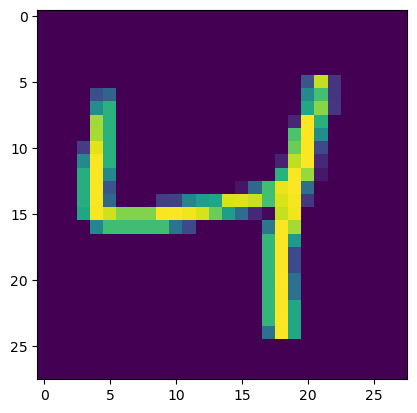

In [5]:
plt.imshow(X_train[2])

In [6]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

C:\Users\Shivam 007\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Start time
start_time = time.time()
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10)

# End time
end_time = time.time()
total_time = end_time - start_time  # Total time taken
total_time

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9090 - loss: 0.8382 - val_accuracy: 0.9738 - val_loss: 0.0810
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9779 - loss: 0.0706 - val_accuracy: 0.9767 - val_loss: 0.0784
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9831 - loss: 0.0547 - val_accuracy: 0.9789 - val_loss: 0.0794
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9851 - loss: 0.0442 - val_accuracy: 0.9802 - val_loss: 0.0655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9815 - val_loss: 0.0627
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.9836 - val_loss: 0.0617
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9805 - val_loss: 0.0881
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9925 - loss: 0

152.52550220489502

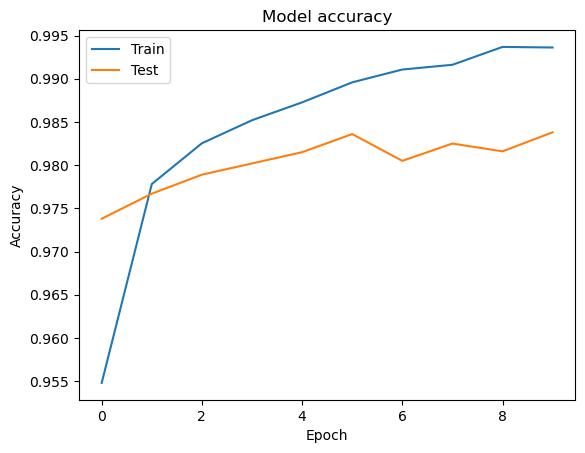

In [11]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## High Perfomance Computing

In [13]:
import tensorflow as tf

# Create a strategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy()

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a dataset and distribute it across multiple devices
with strategy.scope():
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

    test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    test_dataset = test_dataset.batch(32)

# Create the CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [14]:
# Start time
start_time = time.time()

# Train the model in parallel
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# End time
end_time = time.time()
total_time = end_time - start_time  # Total time taken
total_time


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9156 - loss: 0.2839 - val_accuracy: 0.9768 - val_loss: 0.0680
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0567 - val_accuracy: 0.9818 - val_loss: 0.0580
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0363 - val_accuracy: 0.9851 - val_loss: 0.0470
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9933 - loss: 0.0227 - val_accuracy: 0.9846 - val_loss: 0.0517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9866 - val_loss: 0.0489
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9830 - val_loss: 0.0595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9867 - val_loss: 0.0518
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9981 - loss: 0.0058 -

81.98257946968079

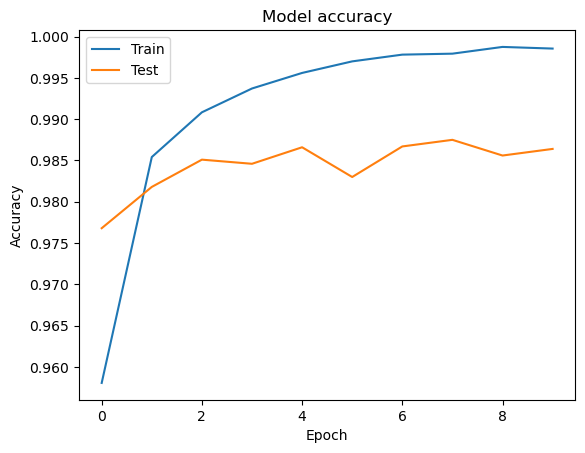

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()